#### Baseando em:

- https://www.kaggle.com/code/nicolastc/segmenta-o-pix2pix/notebook

In [1]:
import pandas as pd
import cv2

In [2]:
import tensorflow as tf
import glob
import cv2
import numpy as np
from keras.layers import Input, Dropout, Concatenate
from keras.layers import BatchNormalization, ZeroPadding2D
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import os
import pathlib
import time
import datetime
from matplotlib import pyplot as plt
from IPython import display


In [3]:
import os

pasta = "dataset_todo/"

def files_path04(path):
    infos =[]
    for p, _, files in os.walk(os.path.abspath(path)):
        for file in files:
            infos.append(os.path.join(p, file))
    return infos

dados = files_path04(pasta)
tipo = [i.split("\\")[-3] for i in dados]
subgroup = [i.split("\\")[-2] for i in dados]
filename = [i.split("\\")[-1] for i in dados]
classe = [0 if x == "benigno" else 1 for x in tipo  ]
df = pd.DataFrame()
df['filename'] = filename
df['subgroup'] = subgroup
df['tipo'] = tipo
df['classe'] = classe

In [4]:
df

,filename,subgroup,tipo,classe
0,benigno10.png,53453eb2e4b05911cd6db1378,benigno,0
1,benigno11.png,53453eb2e4b05911cd6db1378,benigno,0
2,benigno12.png,53453eb2e4b05911cd6db1378,benigno,0
3,benigno13.png,53453eb2e4b05911cd6db1378,benigno,0
4,benigno210.png,53453eb2e4b05911cd6db1379,benigno,0
...,...,...,...,...
5620,maligno3077.png,53454d61e4b05911cd6db51aNodule 005,maligno,1
5621,maligno3078.png,53454d61e4b05911cd6db51aNodule 005,maligno,1
5622,maligno3079.png,53454d61e4b05911cd6db51aNodule 005,maligno,1
5623,maligno3080.png,53454d72e4b05911cd6db51dNodule 002,maligno,1


In [5]:
pasta = "dataset_seg/"

def files_path04(path):
    infos =[]
    for p, _, files in os.walk(os.path.abspath(path)):
        for file in files:
            infos.append(os.path.join(p, file))
    return infos

dados = files_path04(pasta)
tipo = [i.split("\\")[-3] for i in dados]
subgroup = [i.split("\\")[-2] for i in dados]
filename = [i.split("\\")[-1] for i in dados]
classe = [0 if x == "benigno" else 1 for x in tipo  ]
df_seg = pd.DataFrame()
df_seg['filename'] = filename
df_seg['subgroup'] = subgroup
df_seg['tipo'] = tipo
df_seg['classe'] = classe

In [6]:
df_seg

,filename,subgroup,tipo,classe
0,benigno10.png,1,benigno,0
1,benigno11.png,1,benigno,0
2,benigno12.png,1,benigno,0
3,benigno13.png,1,benigno,0
4,benigno1040.png,10,benigno,0
...,...,...,...,...
5620,maligno993.png,99,maligno,1
5621,maligno994.png,99,maligno,1
5622,maligno995.png,99,maligno,1
5623,maligno996.png,99,maligno,1


In [7]:
from numpy import nan 

In [8]:
subgroup_todo = []
for i in df_seg['filename']:
    if df[df['filename']==i]['subgroup'].values.shape[0] > 1:
        subgroup_todo.append(nan)
    else:   
        subgroup_todo.append(df[df['filename']==i]['subgroup'].values[0])
    

In [9]:
df_seg['subgroup_todo'] = subgroup_todo

In [10]:
df_seg

,filename,subgroup,tipo,classe,subgroup_todo
0,benigno10.png,1,benigno,0,53453eb2e4b05911cd6db1378
1,benigno11.png,1,benigno,0,53453eb2e4b05911cd6db1378
2,benigno12.png,1,benigno,0,53453eb2e4b05911cd6db1378
3,benigno13.png,1,benigno,0,53453eb2e4b05911cd6db1378
4,benigno1040.png,10,benigno,0,53453ec7e4b05911cd6db13f2
...,...,...,...,...,...
5620,maligno993.png,99,maligno,1,53454085e4b05911cd6db2058066
5621,maligno994.png,99,maligno,1,53454085e4b05911cd6db2058066
5622,maligno995.png,99,maligno,1,53454085e4b05911cd6db2058066
5623,maligno996.png,99,maligno,1,53454085e4b05911cd6db2058066


In [11]:
df_seg = df_seg.dropna()
df_seg

,filename,subgroup,tipo,classe,subgroup_todo
0,benigno10.png,1,benigno,0,53453eb2e4b05911cd6db1378
1,benigno11.png,1,benigno,0,53453eb2e4b05911cd6db1378
2,benigno12.png,1,benigno,0,53453eb2e4b05911cd6db1378
3,benigno13.png,1,benigno,0,53453eb2e4b05911cd6db1378
4,benigno1040.png,10,benigno,0,53453ec7e4b05911cd6db13f2
...,...,...,...,...,...
5620,maligno993.png,99,maligno,1,53454085e4b05911cd6db2058066
5621,maligno994.png,99,maligno,1,53454085e4b05911cd6db2058066
5622,maligno995.png,99,maligno,1,53454085e4b05911cd6db2058066
5623,maligno996.png,99,maligno,1,53454085e4b05911cd6db2058066


In [12]:
import matplotlib.pyplot as plt

In [13]:
import cv2

In [14]:
df_seg

,filename,subgroup,tipo,classe,subgroup_todo
0,benigno10.png,1,benigno,0,53453eb2e4b05911cd6db1378
1,benigno11.png,1,benigno,0,53453eb2e4b05911cd6db1378
2,benigno12.png,1,benigno,0,53453eb2e4b05911cd6db1378
3,benigno13.png,1,benigno,0,53453eb2e4b05911cd6db1378
4,benigno1040.png,10,benigno,0,53453ec7e4b05911cd6db13f2
...,...,...,...,...,...
5620,maligno993.png,99,maligno,1,53454085e4b05911cd6db2058066
5621,maligno994.png,99,maligno,1,53454085e4b05911cd6db2058066
5622,maligno995.png,99,maligno,1,53454085e4b05911cd6db2058066
5623,maligno996.png,99,maligno,1,53454085e4b05911cd6db2058066


In [15]:
loc = 98

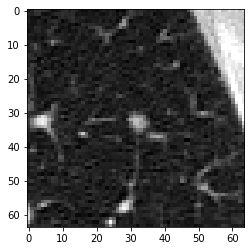

In [16]:
plt.imshow(cv2.imread("dataset_todo/"+df_seg.iloc[loc]['tipo']+"/"+df_seg.iloc[loc]['subgroup_todo']+"/"+df_seg.iloc[loc]['filename']))

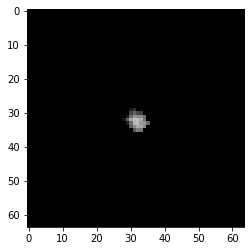

In [17]:
plt.imshow(cv2.imread("dataset_seg/"+df_seg.iloc[loc]['tipo']+"/"+df_seg.iloc[loc]['subgroup']+"/"+df_seg.iloc[loc]['filename']))

Criar auto encoder pra transformação

In [18]:
df_exp = df_seg.sample(frac=1)
df_exp

,filename,subgroup,tipo,classe,subgroup_todo
3520,maligno1501.png,150,maligno,1,53454227e4b05911cd6db2e5Nodule 003
614,benigno237918.png,237,benigno,0,5345412ce4b05911cd6db27aNodule 005
5584,maligno930.png,93,maligno,1,53454075e4b05911cd6db1fa1617
1173,benigno3541437.png,354,benigno,0,534542d7e4b05911cd6db31aNodule 009
904,benigno3021181.png,302,benigno,0,53454214e4b05911cd6db2dd77449
...,...,...,...,...,...
660,benigno248960.png,248,benigno,0,53454168e4b05911cd6db29280887
2200,benigno5632388.png,563,benigno,0,53454947e4b05911cd6db455131291
4403,maligno2435.png,243,maligno,1,534548f9e4b05911cd6db447161959
3776,maligno1781.png,178,maligno,1,53454362e4b05911cd6db3383099


In [19]:
df_exp['filename'].duplicated().any()

False

In [20]:

df_train = df_exp


In [21]:
path_treino_X = []
path_treino_Y = []
for index, row in df_train.iterrows():
    completo = "dataset_todo/"+row['tipo']+"/"+row['subgroup_todo']+"/"+row['filename']
    segmentado = "dataset_seg/"+row['tipo']+"/"+row['subgroup']+"/"+row['filename']
    path_treino_X.append(completo)
    path_treino_Y.append(segmentado)

In [22]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMG_CHANNELS = 1
BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [23]:
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from tensorflow import keras

import tensorflow as tf

In [24]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [25]:
def decode_and_resize(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, (IMG_WIDTH,IMG_HEIGHT))
    img = (tf.image.convert_image_dtype(img, tf.float32)/125.5) -1
    return img

def decode_and_resize_mask(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, (IMG_WIDTH,IMG_HEIGHT))
    img = tf.image.convert_image_dtype(img, tf.float32)/255
    img = (img >= 0.5).astype(np.uint8)
    return img


def process_input(img_path_x, img_path_y):
    return decode_and_resize(img_path_x), decode_and_resize_mask(img_path_y)

def make_dataset(x_image, y_image):
    dataset = tf.data.Dataset.from_tensor_slices((x_image, y_image))
    dataset = dataset.shuffle(len(x_image))
    dataset = dataset.map(process_input)
    dataset = dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return dataset

quebra_validacao = int(len(path_treino_X)*0.9)

dataset = make_dataset(path_treino_X[:quebra_validacao], path_treino_Y[:quebra_validacao])
valid_dataset = make_dataset(path_treino_X[quebra_validacao:], path_treino_Y[quebra_validacao:])

In [26]:
img_shape = (64,64,1)
channels = 1

In [27]:
def build_generator():

    # define an E-Net block
    # image input
    in_image = Input(shape=img_shape)

    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (in_image)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)

    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    return Model(inputs=in_image, outputs=outputs)

In [28]:
generator = build_generator()

In [29]:
generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 64, 64, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   2320        dropout[0][0]                    
______________________________________________________________________________________________

In [30]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = tf.keras.layers.Input(shape=img_shape, name='input_image')
    tar = tf.keras.layers.Input(shape=img_shape, name='target_image')

    x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

    down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
    down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
    down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)

In [31]:
def d_layer(layer_input, filters, f_size=4, bn=True):
    """Discriminator layer"""
    d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
    d = LeakyReLU(alpha=0.2)(d)
    if bn:
        d = BatchNormalization(momentum=0.8)(d)
    return d

In [32]:
def build_discriminator():
    
    img_A = Input(shape=img_shape, name='input_image')
    img_B = Input(shape=img_shape, name='target_image')

    # Concatenate image and conditioning image by channels to produce input
    combined_imgs = Concatenate(axis=-1)([img_A, img_B])

    d1 = d_layer(combined_imgs, df, bn=False)
    d2 = d_layer(d1, df*2)
    d3 = d_layer(d2, df*4)
    d4 = d_layer(d3, df*8)

    b = BatchNormalization()(d4)
    le = LeakyReLU(0.2)(b)
    #zero = ZeroPadding2D()(le)

    validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(le)

    return Model(inputs=[img_A, img_B], outputs=validity)

In [33]:
df = 128

In [34]:
discriminator = build_discriminator()

In [35]:
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
target_image (InputLayer)       [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 64, 64, 2)    0           input_image[0][0]                
                                                                 target_image[0][0]               
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 32, 32, 128)  4224        concatenate_4[0][0]        

In [36]:
LAMBDA = 1
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # Mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

In [37]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

In [38]:
generator_optimizer = Adam(2e-4, beta_1=0.5)
discriminator_optimizer = Adam(2e-4, beta_1=0.5)

In [39]:
def sample_images(model, Input, Target):
    prediction = model(Input, training=True)
    plt.figure(figsize=(15, 15))

    r, c = 1, 4

    inputI = Input[0] 
    target = Target[0] 
    pred = prediction[0] 
    sub = target-pred

    gen_imgs = [Input[0] , Target[0], prediction[0], sub]
    titles = ['Input', 'Target', 'Generated', 'Target-Generated']
    for j in range(c):
        plt.subplot(1, c, j+1)
        plt.title(titles[j])
        plt.axis('off')
        plt.imshow(gen_imgs[j][:,:,::-1] * 0.5 + 0.5, cmap="gray")
    plt.show()

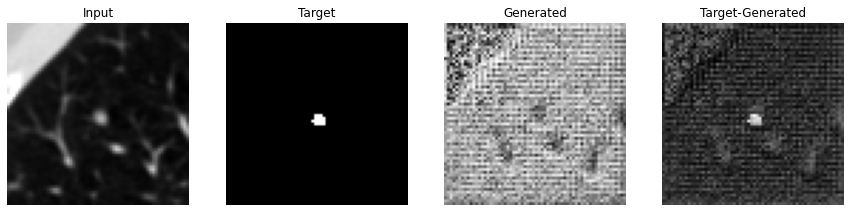

In [40]:
for example_input, example_target in dataset.take(1):
    sample_images(model=generator ,Input=example_input, Target=example_target)

In [41]:
@tf.function
def train_step(input_image, target, step):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

        generator_gradients = gen_tape.gradient(gen_total_loss,
                                              generator.trainable_variables)
        discriminator_gradients = disc_tape.gradient(disc_loss,
                                                   discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(generator_gradients,
                                              generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                                  discriminator.trainable_variables))

In [42]:
def fit(train_ds, test_ds, steps):
    example_input, example_target = next(iter(test_ds.take(1)))
    start_time = datetime.datetime.now() 
    for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
        if (step) % 1000 == 0:
            start = datetime.datetime.now()
            display.clear_output(wait=True)

            
            elapsed_time = datetime.datetime.now() - start_time

            if step != 0:
                #wrong value
                print(f'Time taken for 1000 steps: {elapsed_time} sec\n')
            else:
                print(f'Time taken for 1000 steps: {start - elapsed_time} sec\n')

            sample_images(model=generator, Input=example_input, Target=example_target)
            print(f"Step: {step//1000}k")
            print(f'elapsed_time Time: {elapsed_time}')

        train_step(input_image, target, step)

        # Training step
        if (step+1) % 10 == 0:
            print(f'.', end='', flush=True)

Time taken for 1000 steps: 2:19:53.120835 sec



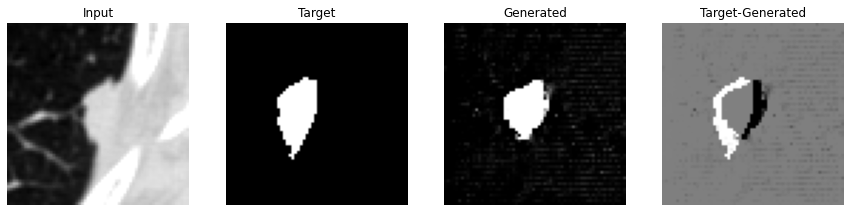

Step: 99k
elapsed_time Time: 2:19:53.120835
....................................................................................................

In [43]:
fit(dataset, dataset, steps=100000)

Teste

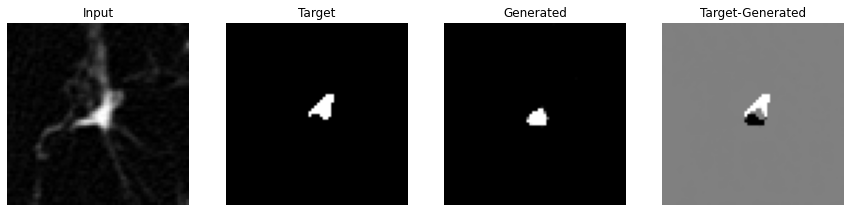

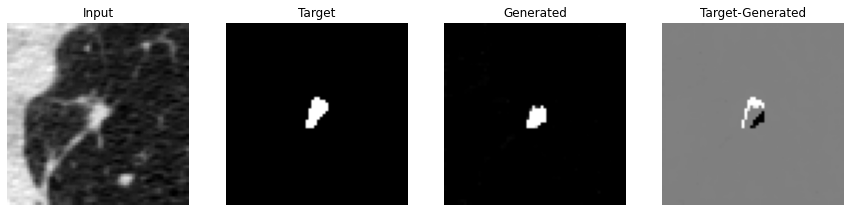

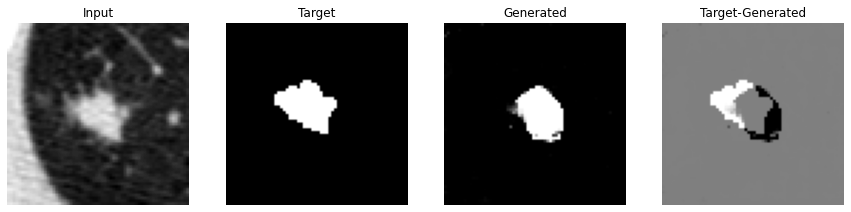

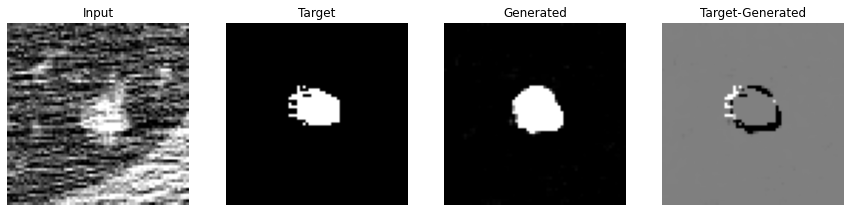

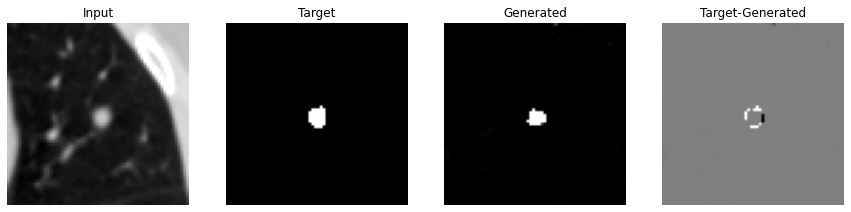

In [44]:
for example_input, example_target in valid_dataset.take(5):
    sample_images(model=generator ,Input=example_input, Target=example_target)